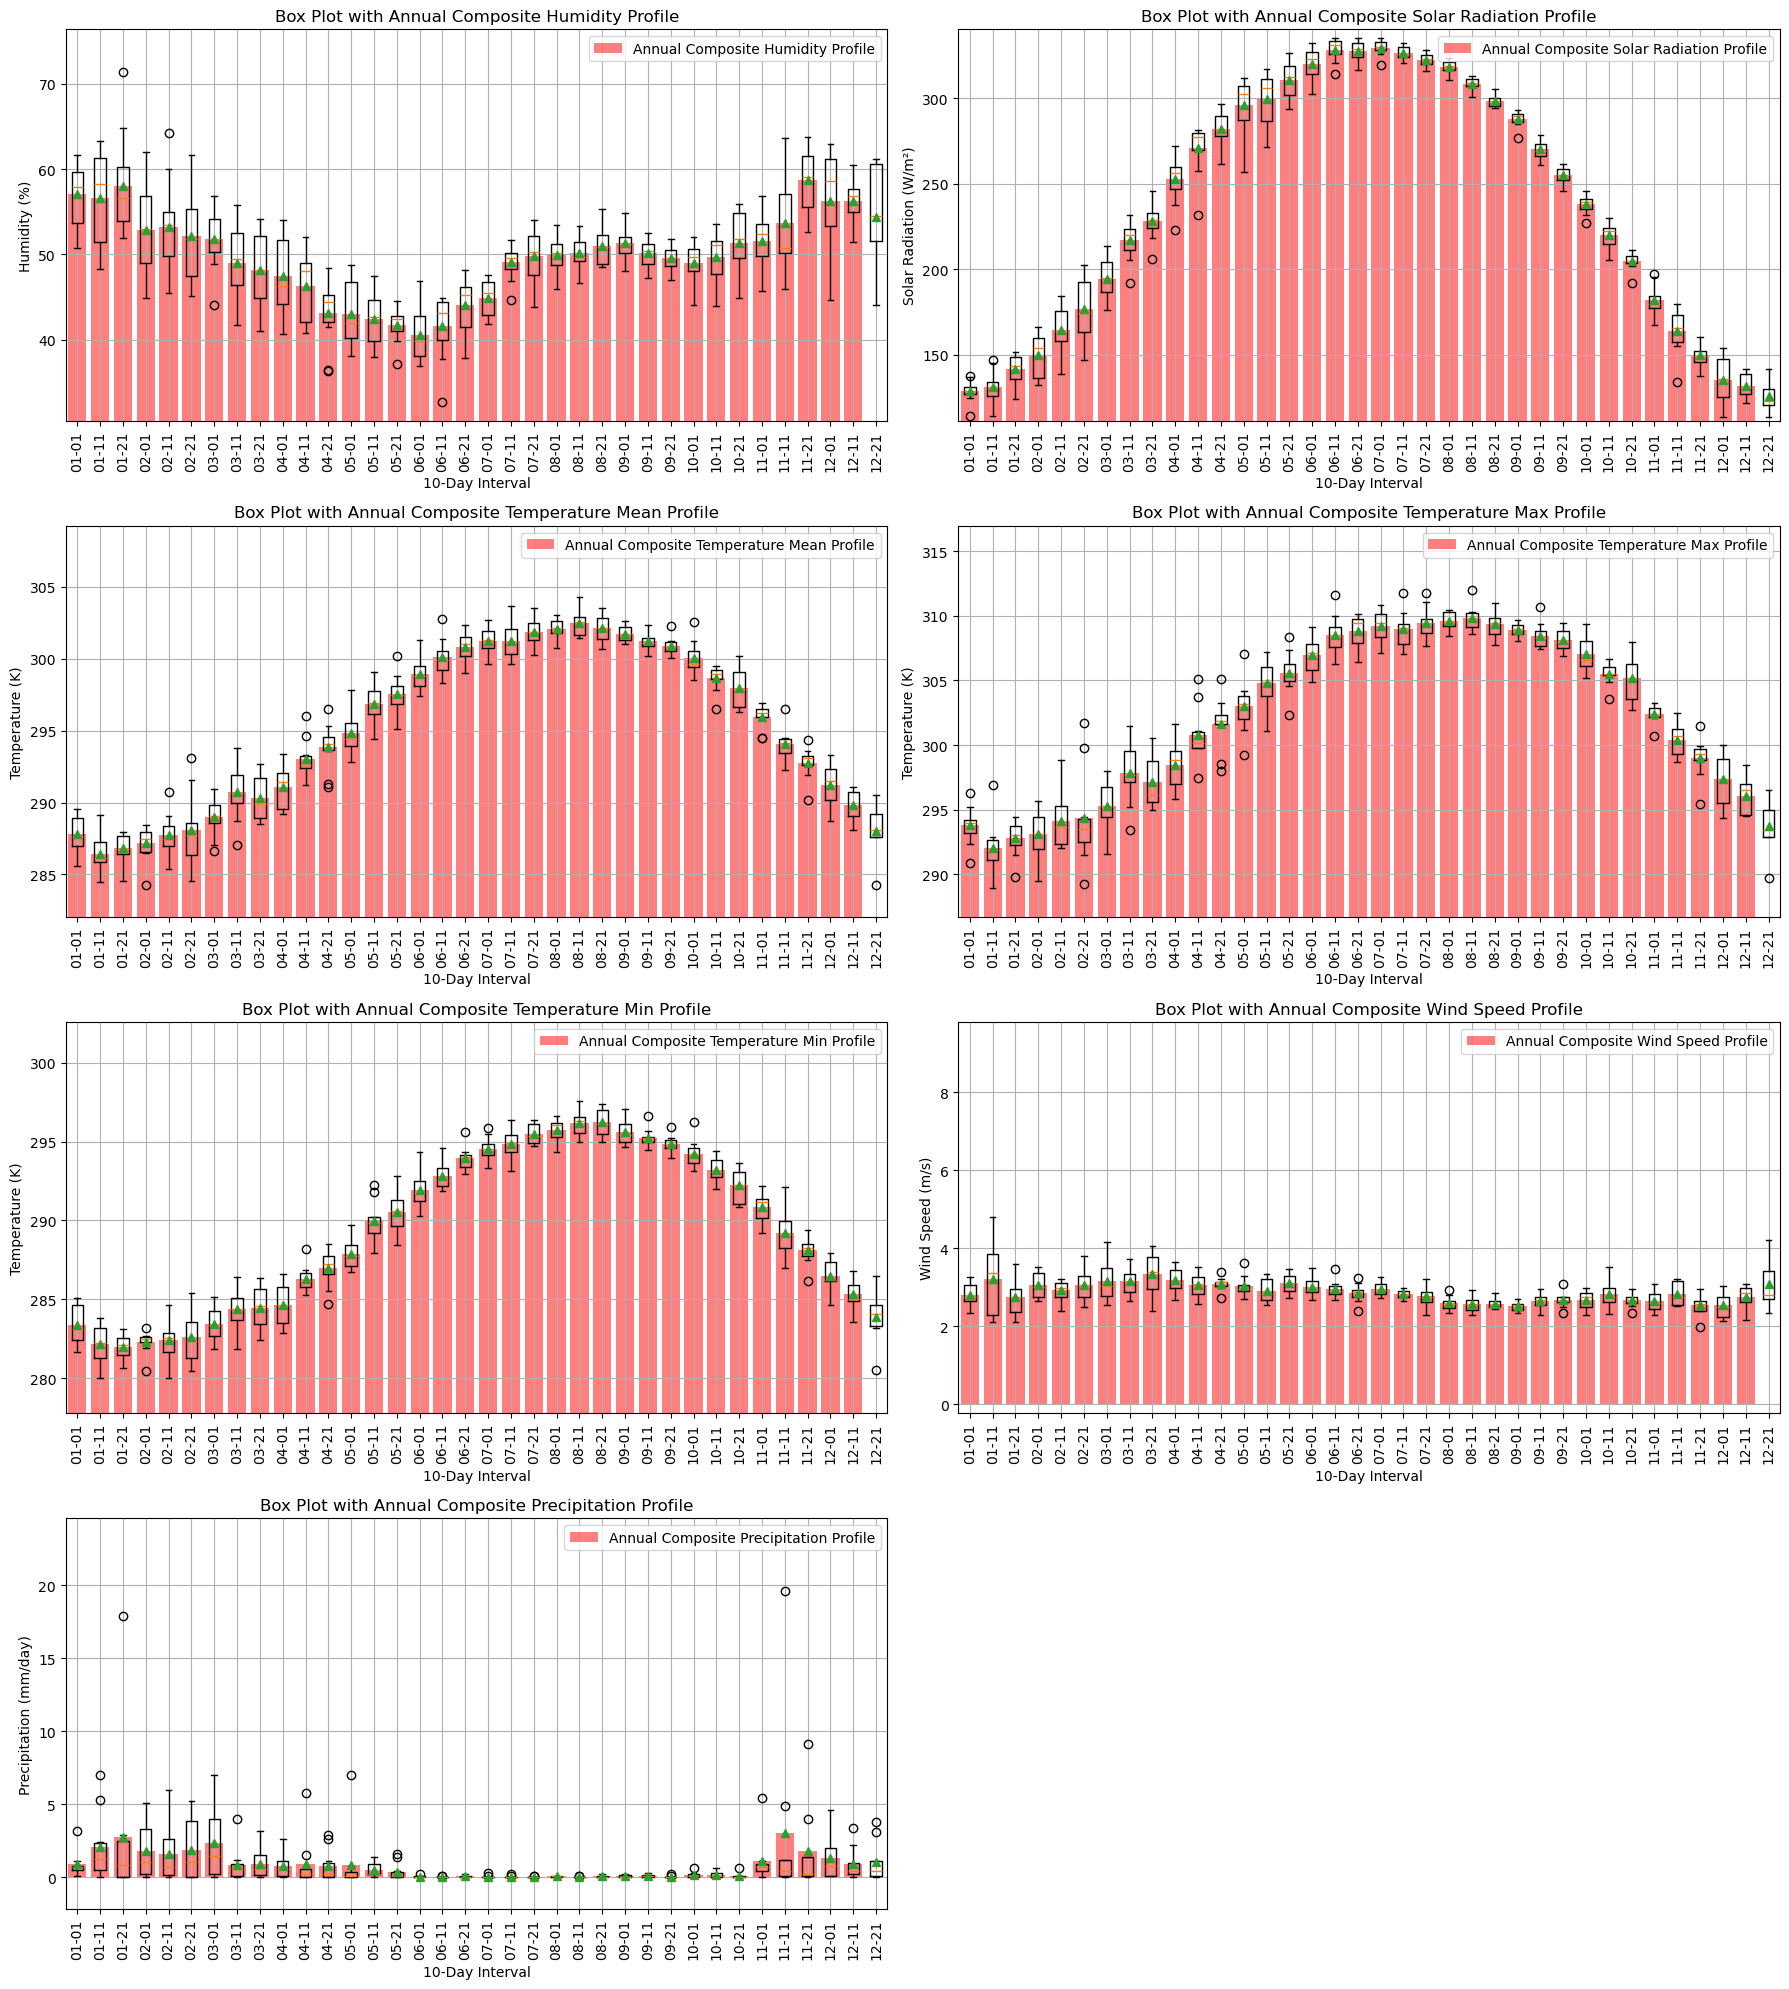

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the humidity dataset
file_path = r'D:\Thesis Work\charts\AgERA5.xlsx'
df = pd.read_excel(file_path)

# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define the variables and their respective units
variables = {
    'Humidity': 'Humidity (%)',
    'Solar Radiation': 'Solar Radiation (W/m²)',
    'Temperature Mean': 'Temperature (K)',
    'Temperature Max': 'Temperature (K)',
    'Temperature Min': 'Temperature (K)',
    'Wind Speed': 'Wind Speed (m/s)',
    'Precipitation': 'Precipitation (mm/day)'
}

# Group data into 36 intervals based on the 'Date' column (assuming the file is divided into 10-day periods)
df['10-day-interval'] = df['Date'].dt.strftime('%m-%d')

# Create a figure with two plots per row (4 rows for 7 variables)
fig, axs = plt.subplots(4, 2, figsize=(18, 20))

# Ensure the last subplot is empty if there are an odd number of variables
ax_list = axs.flatten()

# Loop through each variable and create a box plot with an annual composite profile
for i, (var, unit) in enumerate(variables.items()):
    # Group by the '10-day-interval' and calculate the mean for the annual composite profile
    grouped_df = df.groupby('10-day-interval')[var].describe()
    mean_profile = df.groupby('10-day-interval')[var].mean()

    # Shift the mean profile by one step
    mean_profile_shifted = mean_profile.shift(1)

    # Box plot: Create a box plot for each 10-day interval
    ax_list[i].boxplot([df[var][df['10-day-interval'] == interval] for interval in grouped_df.index], 
                       labels=grouped_df.index, showmeans=True)

    # Bar chart (shifted annual composite profile) with proper y-limit
    ax_list[i].bar(grouped_df.index, mean_profile_shifted, color='red', alpha=0.5, label=f'Annual Composite {var} Profile')

    # Customize the plot
    ax_list[i].set_title(f'Box Plot with Annual Composite {var} Profile')
    ax_list[i].set_xlabel('10-Day Interval')
    ax_list[i].set_ylabel(unit)  # Add the units to the y-axis
    ax_list[i].set_ylim(grouped_df['min'].min() - 2.2, grouped_df['max'].max() + 5)  # Adjust the y-axis limits
    ax_list[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
    ax_list[i].grid(True)
    ax_list[i].legend()

# Remove any empty subplots (if there's an odd number of variables)
if len(variables) % 2 != 0:
    fig.delaxes(ax_list[-1])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()